# Import Modules

In [1]:
from Dataload import dataload

from module import resnet,transformer,video_model,invres

import torch
import torch.nn as nn
from torchsummary import summary
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
from torchvision import  utils

from src import detect_faces, show_bboxes
from PIL import Image
import numpy as np
from torchvision import transforms

In [4]:
np_load_old = np.load

## 기존의 parameter을 바꿔줌
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


# Test Image #1

In [35]:
train_data=dataload.Video_Frame_Data('Dataset/Train_labels.txt',base_path_v='Dataset/Train',strict_num=26)
img=train_data[2556][0][4]
trans = transforms.ToPILImage()


max_face=5
img=trans(img*0.5+0.5)
bounding_boxes, landmarks = detect_faces(img)

transform1=transforms.Compose([
         transforms.Resize((64,64)), 
     transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])

img_list=[]
for box_index,(left,right,up,bottom,_) in enumerate(bounding_boxes):
    print(len(img_list))
    cropped_img=img.crop((left,right,up,bottom))
    img_list.append(transform1(cropped_img))
    if len(img_list)==max_face:
        break
        
while len(img_list) !=max_face:
    END_PAD= Image.new(mode = "RGB", size = (256, 256), color =(0, 0, 0))
    img_list.append(transform1(END_PAD))
img_list=torch.stack(img_list)

img_list.shape

0
1
2
3
4


torch.Size([5, 3, 64, 64])

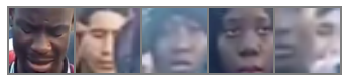

In [36]:
#plt.figure(figsize=(, 16))
grid_border_size = 2
grid = utils.make_grid(img_list)

plt.imshow((((grid.numpy()*0.5)+0.5).transpose((1, 2, 0))))
plt.axis('off')
plt.ioff()
plt.show()

In [19]:
from module.resnet_o import resnet18

In [20]:
test_model=resnet18()

In [25]:
test_model(img_list[1].unsqueeze(0)).shape

torch.Size([1, 1000])

In [32]:
class Face_Feature(nn.Module):
    
    def __init__(self):
        super(Face_Feature, self).__init__()
        
        self.resnet=resnet18()
        self.fc1=nn.Linear(1000,2)
        
    def forward(self,x):
        
        return self.fc1(self.resnet(x))

In [33]:
test_model=Face_Feature()

In [35]:
a=test_model(img_list[1].unsqueeze(0))

In [37]:
loss_func = torch.nn.MSELoss()


In [44]:
import pandas as pd
training_data=pd.read_csv("training.csv")

from torch.utils.data import Dataset, DataLoader


In [114]:
class AffectNetData(Dataset):
    def __init__(self, csv_file,base_path):
        self._base_path=base_path
        self._table = pd.read_csv(csv_file)
        self.transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])
    def __len__(self):
        return len(self._table)

    def __getitem__(self, idx):
        img_path = os.path.join(self._base_path_v,self._table.subDirectory_filepath[idx])
        arousal=torch.from_numpy(np.array(self._table.arousal[idx]))
        valence=torch.from_numpy(np.array(self._table.valence[idx]))
        labels=torch.stack(arousal,valence).float()
        img=Image.open(img_path)
        img=self.transform(img)
        return (img,labels)

In [115]:
data_transform=transforms.Compose([
                     transforms.Resize((64,64)),
                     transforms.ToTensor(),   
                     transforms.Normalize((0.5,0.5,0.5 ), (0.5, 0.5,0.5))])

In [ ]:
#
#train_set=AffectNetData("training.csv","AffectNet")
#valid_set=AffectNetData("validation.csv","AffectNet")

In [150]:
#train_dataloader = DataLoader(train_data, batch_size=256
#                       , num_workers=0,shuffle=True)

#valid_dataloader = DataLoader(valid_data, batch_size=256
#                       , num_workers=0)

In [140]:
#da

tensor([[ 0.1981, -0.0413],
        [-0.1359, -0.1691]], grad_fn=<AddmmBackward>)

tensor(1.1452, grad_fn=<MseLossBackward>)